In [59]:
"""
1. blurr dulu
gray
black & white
2. extract
"""

'\n1. blurr dulu\ngray\nblack & white\n2. extract\n'

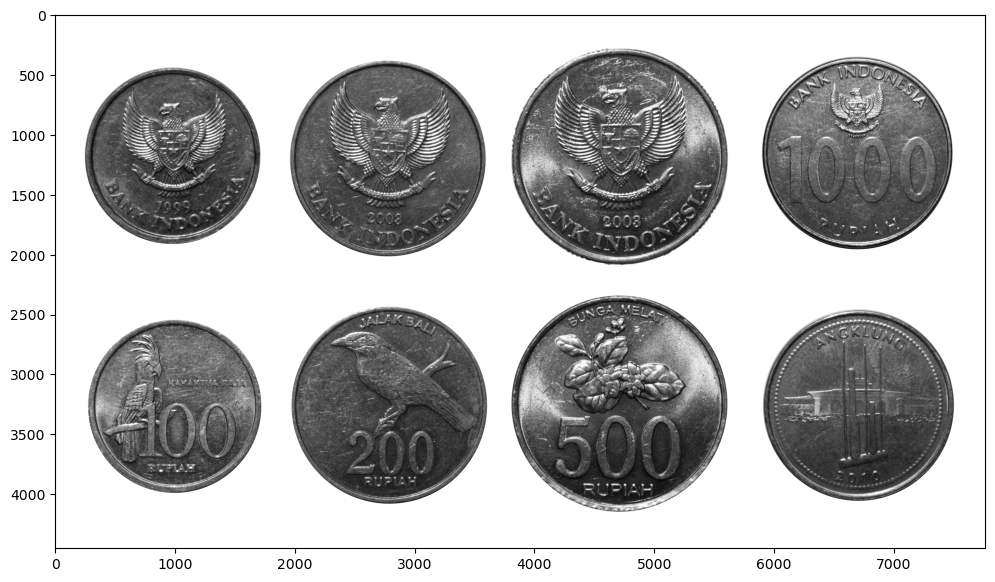

In [60]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)
    
object = cv2.imread('img/coin.jpg',0)
display(object)

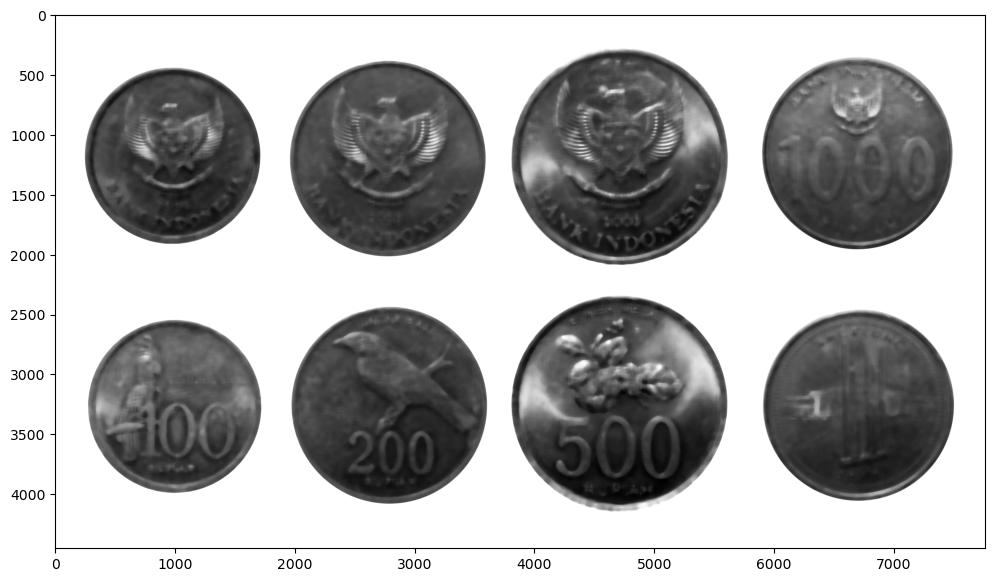

In [61]:
sep_blur = cv2.medianBlur(object, 45)

display(sep_blur)

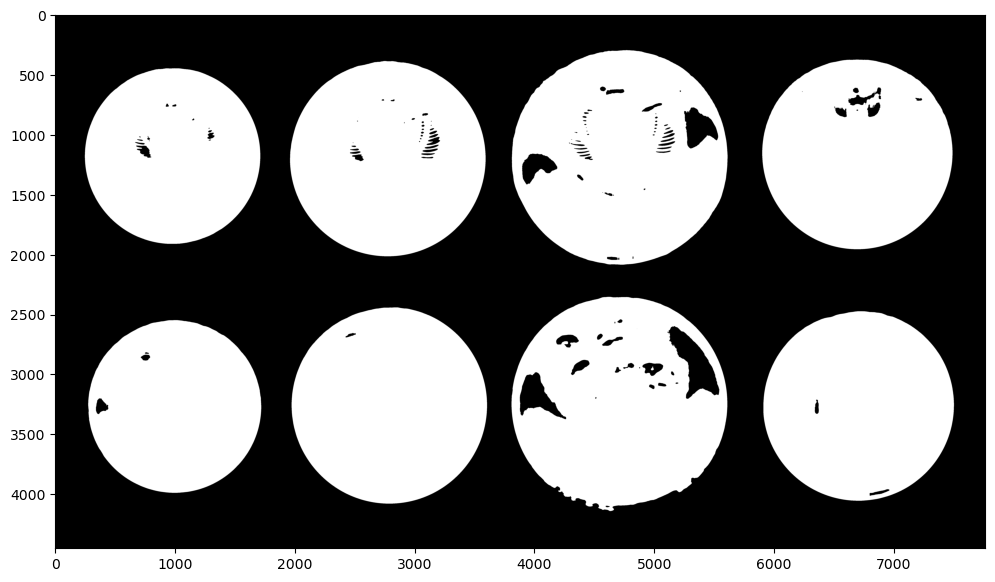

In [62]:
# convert to B&W

ret, sep_thresh = cv2.threshold(sep_blur, 120, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

display(sep_thresh)

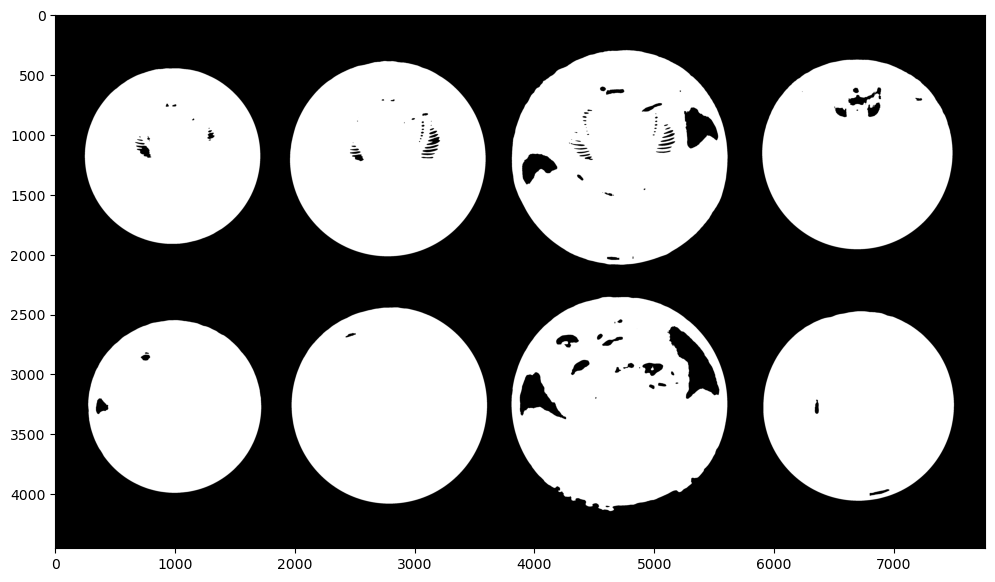

In [63]:
kernel = np.ones((3,3),np.uint8)

kernel = np.array([[1,1,1],[1,1,1],[1,1,1]], dtype=np.uint8)

opening = cv2.morphologyEx(sep_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
display(opening)

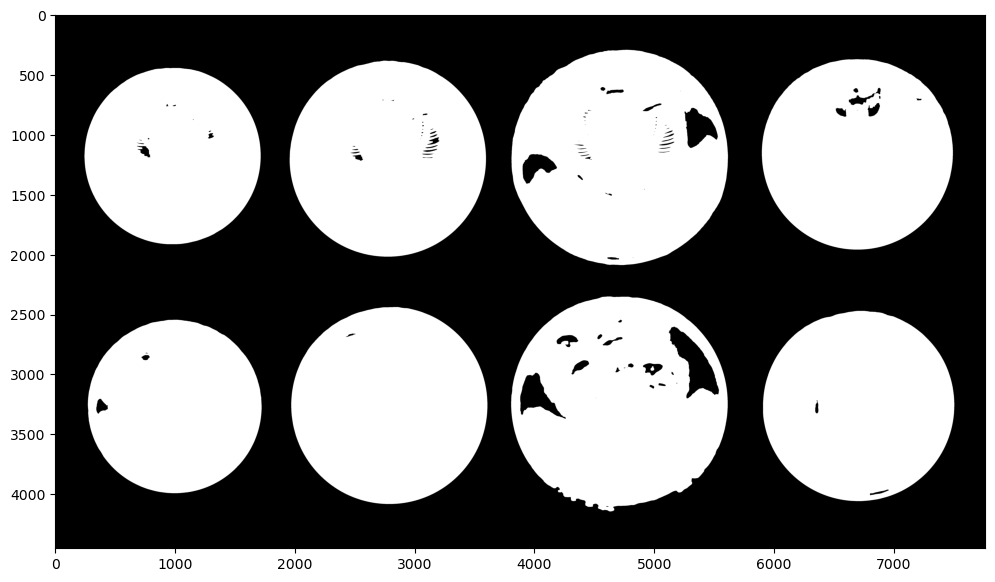

In [64]:
# menambah diameter object

sure_bg = cv2.dilate(opening, kernel, iterations=3)
display(sure_bg)

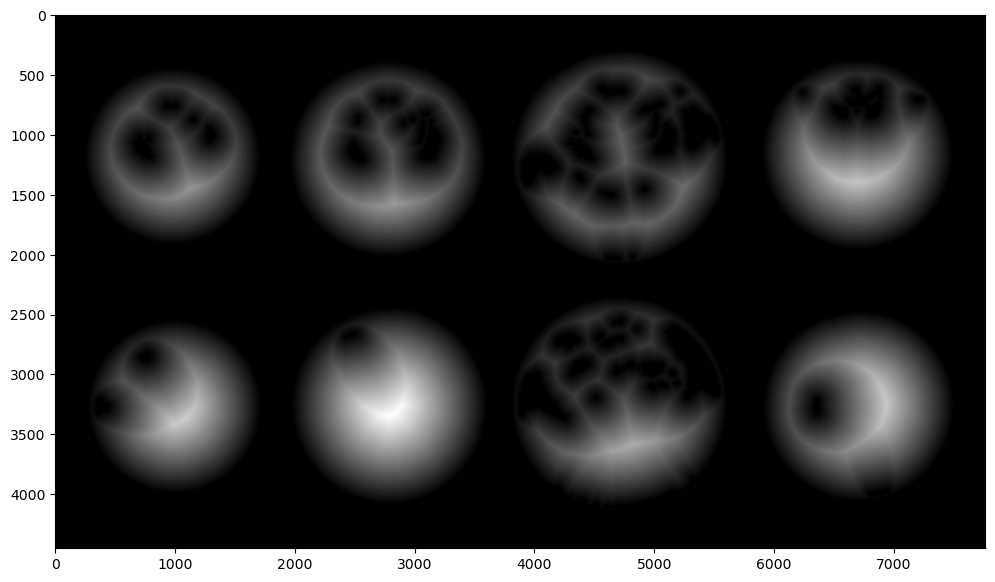

In [65]:
# transformasi value jarak untuk masing2 parameter
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
display(dist_transform)

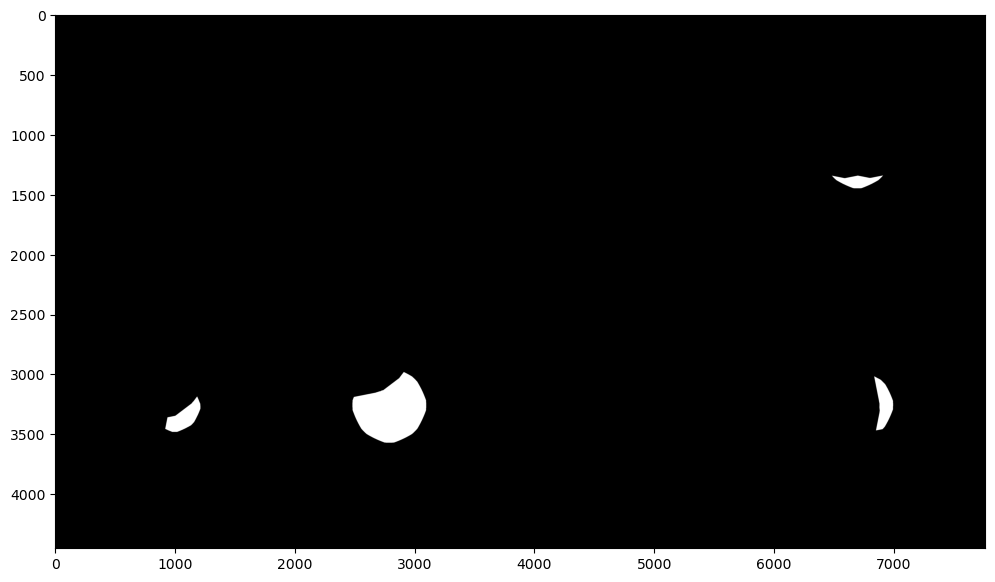

In [66]:
# apply thresholding utk mendapatkan center
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
display(sure_fg)

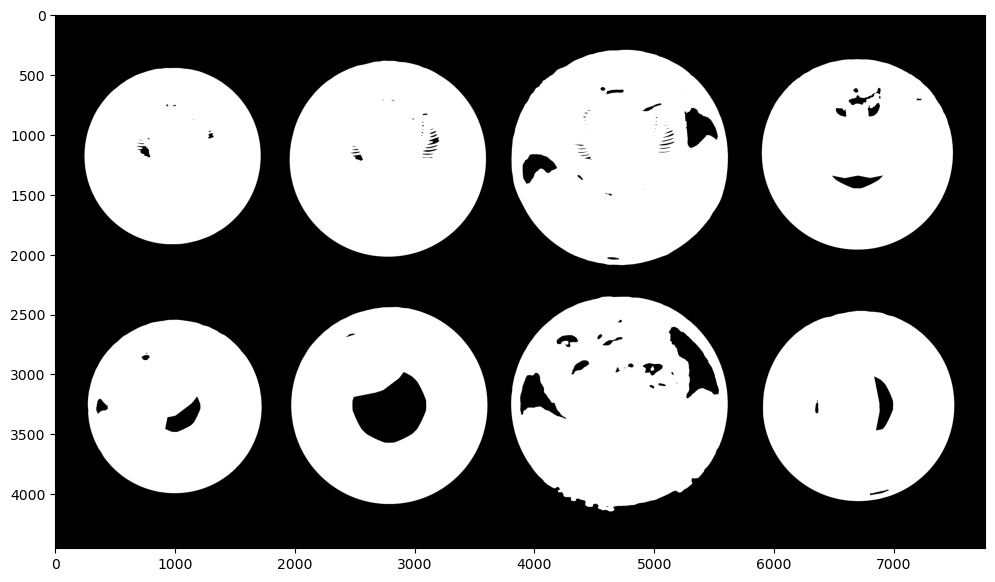

In [67]:
sure_bg = sure_bg.astype(np.uint8)
sure_fg = sure_fg.astype(np.uint8)

unknown = cv2.subtract(sure_bg, sure_fg)
display(unknown)

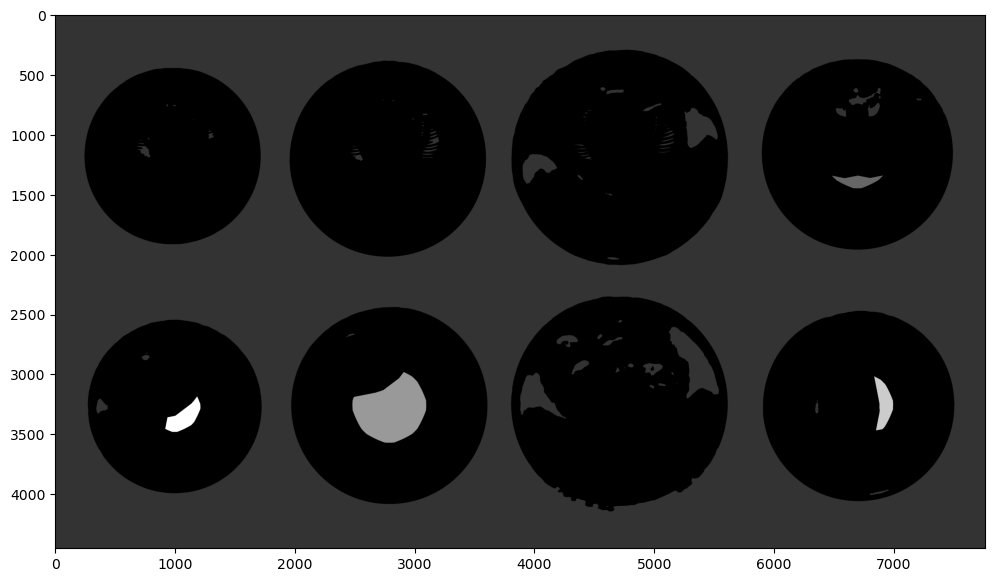

In [68]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1  # agar tidak ada nilai 0
markers[unknown == 255] = 0  # set nilai unknown ke 0
display(markers)

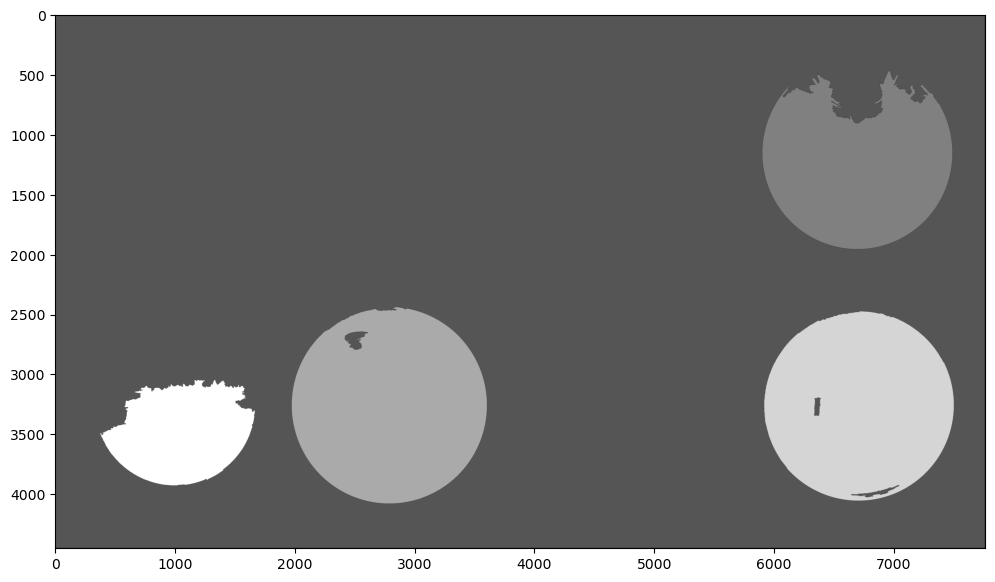

In [69]:
if len(object.shape) == 2 or object.shape[2] == 1:
    object = cv2.cvtColor(object, cv2.COLOR_GRAY2BGR)

markers = cv2.watershed(object, markers)
display(markers)

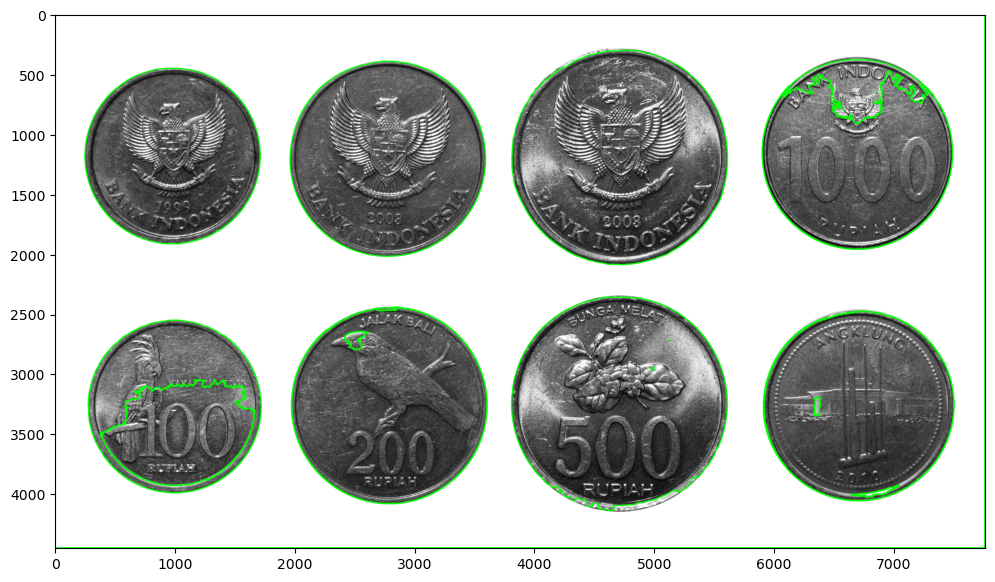

In [74]:
# Pastikan object adalah gambar BGR


contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(object, contours, i, (0, 255, 0), 10)
        
display(object)